In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston

%matplotlib inline #INLINE is used to render the figure on the notebook screen.

In [ ]:
boston = load_boston()

In [ ]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
features = pd.DataFrame(boston.data,columns = boston.feature_names)
target = pd.DataFrame(boston.target,columns = ['Target'])
data = pd.concat([features , target],axis = 1)
#features is for input in dataframe and target is for output

In [ ]:
data2 = data.corr('pearson')


In [ ]:
abs(data2.loc['Target']).sort_values(ascending=False)

Target     1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: Target, dtype: float64

In [ ]:
x=data['RM']
y=data['Target']
x=np.array(x/x.mean())
y=np.array(y/y.mean())

In [ ]:
n=int(0.8*len(x))
x_train = x[:n]
y_train = y[:n]

x_test = x[n:]
y_test = y[n:]

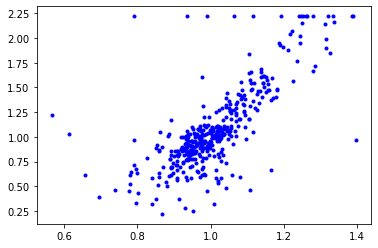

In [ ]:
plt.plot(x_train,y_train,'b.')

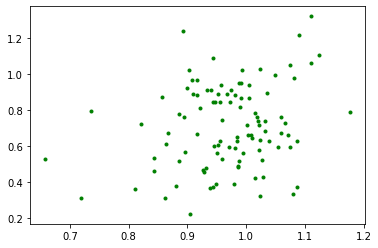

In [ ]:
plt.plot(x_test,y_test,'g.')

In [ ]:
def hypothesis(a,b,x):
  return a*x +b

In [ ]:
def error(a,b,x,y):
  e=0
  m=len(y)
  for i in range(m):
    e+=np.power((hypothesis(a,b,x[i])-y[i]),2)
  return (1/2*m)

In [ ]:
def step_gradient(a,b,x,y,learning_rate):
  grad_a = 0
  grad_b = 0
  m = len(x)
  for i in range(m):
    grad_a += 1/m *(hypothesis(a,b,x[i])-y[i]) * x[i]
    grad_b += 1/m *(hypothesis(a,b,x[i])-y[i]) 
  a = a-(grad_a * learning_rate)
  b = b-(grad_b * learning_rate)
  return a,b

In [ ]:
def descend(initial_a,initial_b,x,y,learning_rate,iterations):
  a=initial_a
  b=initial_b
  for i in range(iterations):
    e = error(a,b,x,y)
    if i %1000 == 0 :
      print(f"Error:{e},a:{a},b:{b}")
    a,b = step_gradient(a,b,x,y,learning_rate)
  return a,b

In [ ]:
a=0
b=1
learning_rate = 0.35
iterations = 30000
final_a,final_b = descend(a,b,x_train,y_train,learning_rate,iterations)


Error:202.0,a:0,b:1
Error:202.0,a:2.388785043663434,b:-1.3326097948970936
Error:202.0,a:2.613539572187805,b:-1.5606233692939464
Error:202.0,a:2.6350958439611167,b:-1.5824922170985847
Error:202.0,a:2.637163312215552,b:-1.5845896646105029
Error:202.0,a:2.6373616036932273,b:-1.5847908314074262
Error:202.0,a:2.637380621886148,b:-1.584810125373047
Error:202.0,a:2.6373824459265265,b:-1.5848119758628647
Error:202.0,a:2.637382620870766,b:-1.5848121533438777
Error:202.0,a:2.6373826376497167,b:-1.5848121703661309
Error:202.0,a:2.6373826392589894,b:-1.584812171998739
Error:202.0,a:2.637382639413336,b:-1.5848121721553234
Error:202.0,a:2.6373826394281368,b:-1.5848121721703388
Error:202.0,a:2.637382639429558,b:-1.5848121721717805
Error:202.0,a:2.6373826394296414,b:-1.5848121721718653
Error:202.0,a:2.6373826394296414,b:-1.5848121721718653
Error:202.0,a:2.6373826394296414,b:-1.5848121721718653
Error:202.0,a:2.6373826394296414,b:-1.5848121721718653
Error:202.0,a:2.6373826394296414,b:-1.5848121721718653

In [ ]:
print(error(a,b,x_train,y_train))
print(error(final_a,final_b,x_train,y_train))

202.0
202.0


In [ ]:
print(error(final_a,final_b,x_test,y_test))

51.0


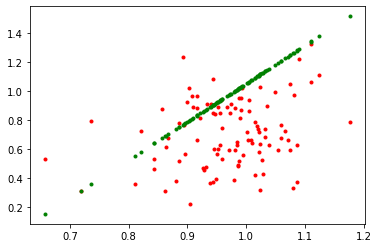

In [ ]:
plt.plot(x_test,y_test,'r.',x_test,hypothesis(final_a,final_b,x_test),'g.')